# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset.

Add any relevant insight for future modelling.

# Imports

In [107]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [108]:
data_path = Path("../data/abalone.csv")
df = pd.read_csv(data_path)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA

In [126]:
print(f"The number of duplicates is {df.duplicated().sum()}.\n")
print(f"The dataset doesn't have missing values:\n {df.isna().sum()}")

The number of duplicates is 0.

The dataset doesn't have missing values:
 Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64


In [110]:
df['Age'] = df['Rings'] + 1.5

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

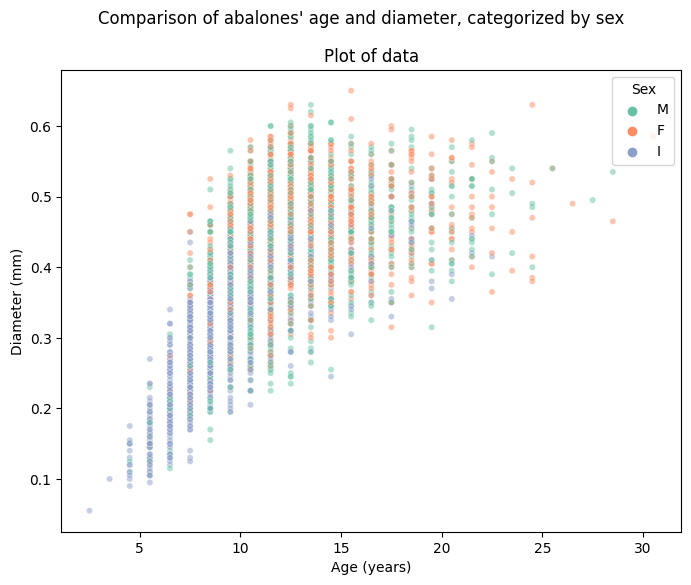

In [111]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Age", y="Diameter", hue="Sex", alpha=0.5, s=20)
plt.title("Plot of data")
plt.suptitle("Comparison of abalones' age and diameter, categorized by sex")
plt.xlabel("Age (years)")
plt.ylabel("Diameter (mm)")

plt.legend(title="Sex", loc="upper right")

plt.show()


### Numerical Columns Analysis

In [113]:
numerical_cols = df.columns.drop(['Sex', 'Rings', 'Age'])

columns_per_row = 2
num_rows = (len(numerical_cols) + columns_per_row - 1) // columns_per_row

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

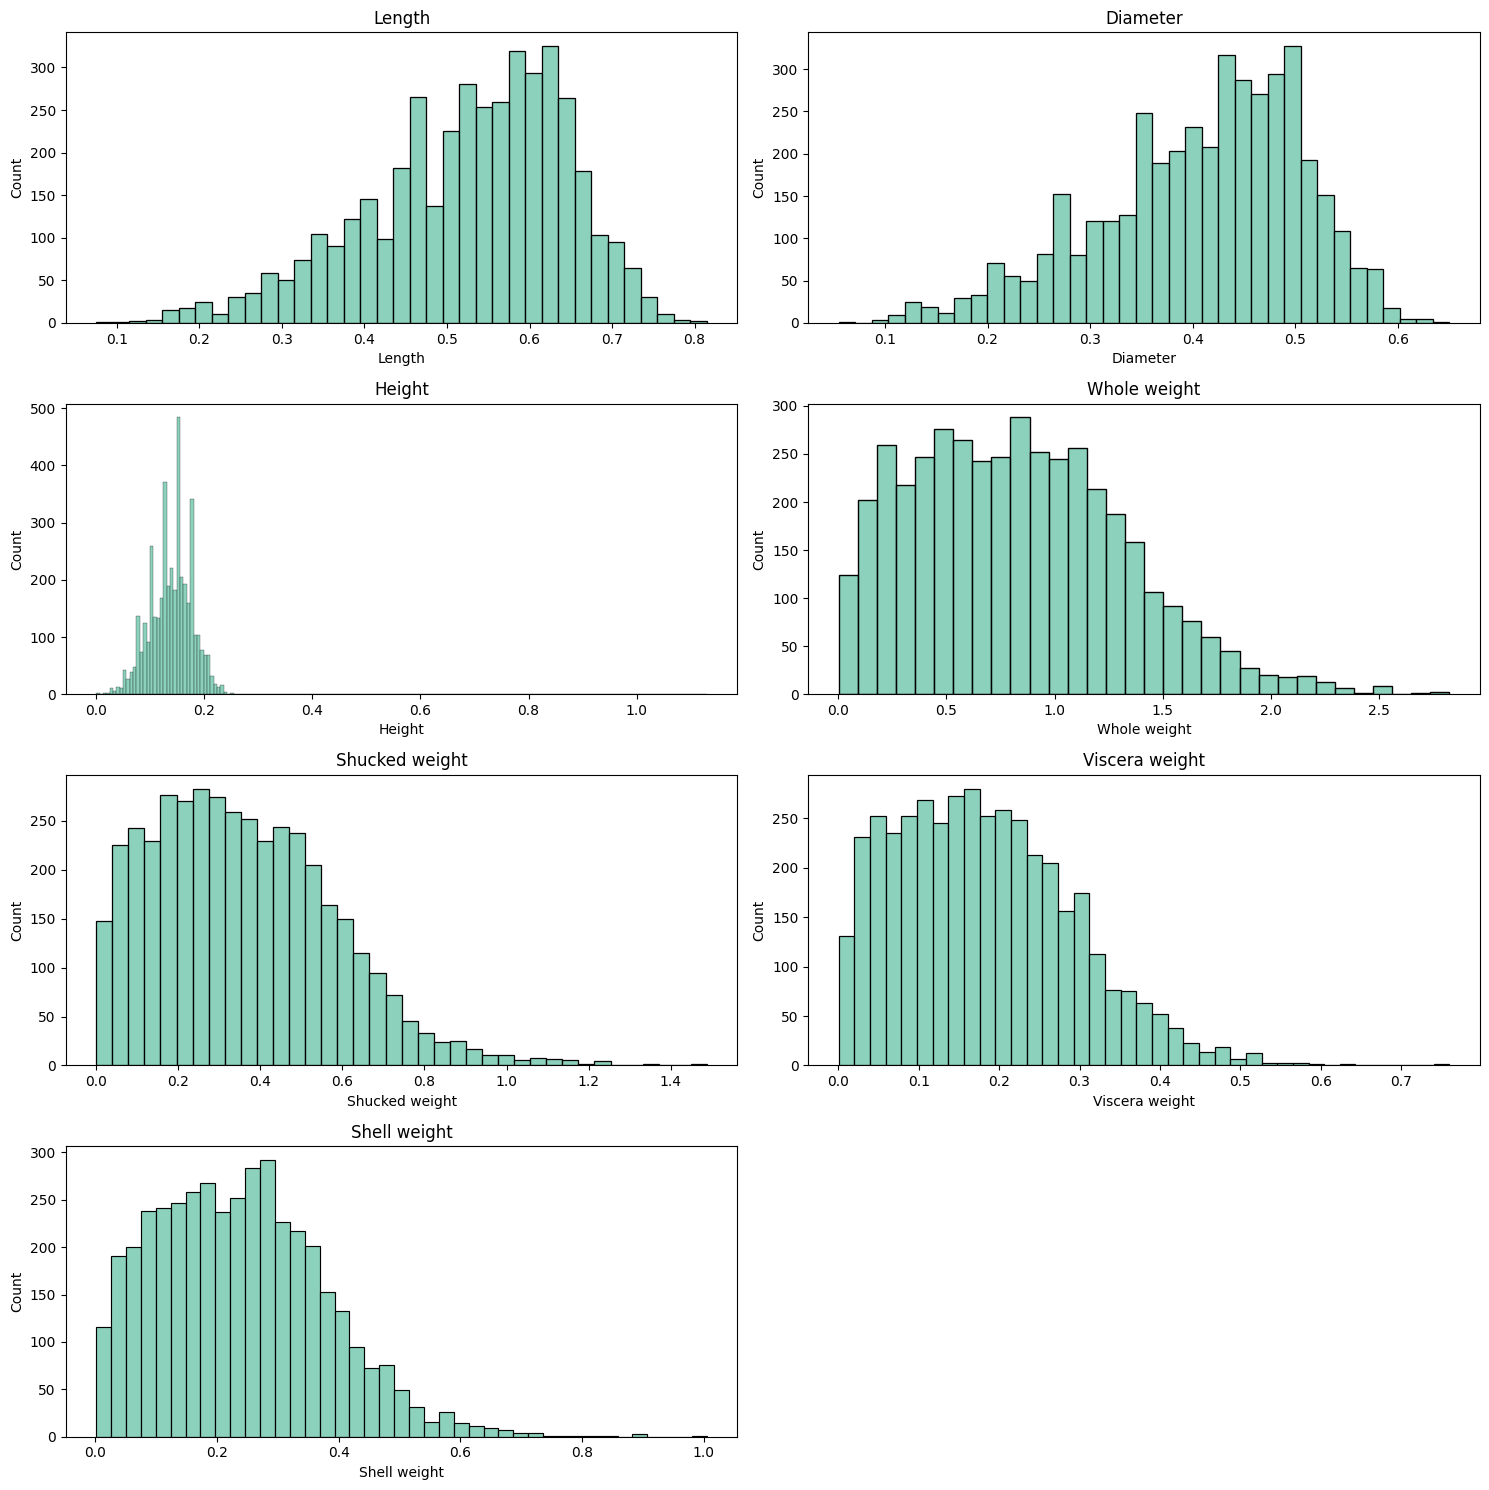

In [121]:
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 15))

axes = axes.flatten()

for i, c in enumerate(numerical_cols):
    sns.histplot(df[c], ax=axes[i])
    axes[i].set_title(c)

for j in range(i + 1, num_rows * columns_per_row):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

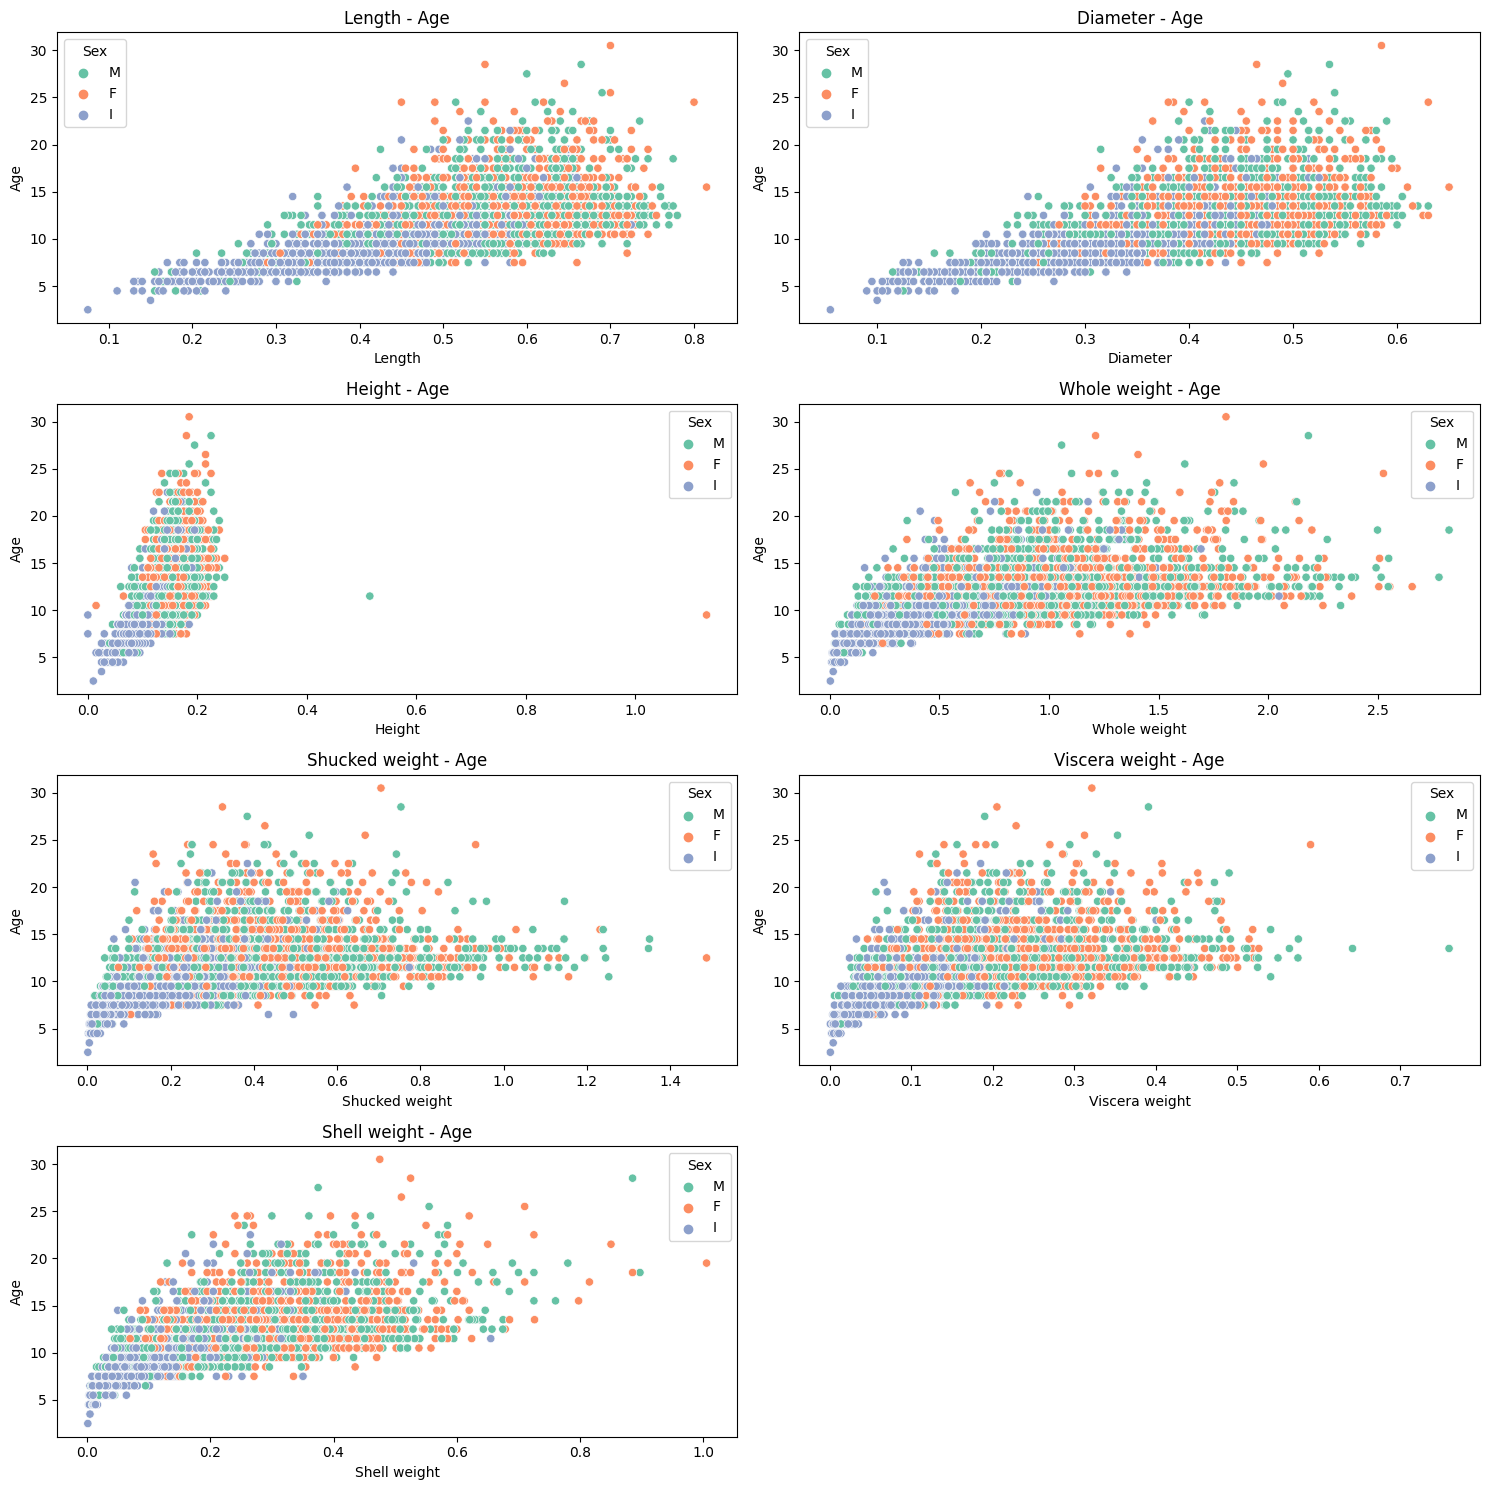

In [115]:
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 15))

axes = axes.flatten()

for i, c in enumerate(numerical_cols):
    sns.scatterplot(data=df, x=c, y="Age", hue="Sex", ax=axes[i])
    axes[i].set_title(f'{c} - Age')

for j in range(i + 1, num_rows * columns_per_row):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

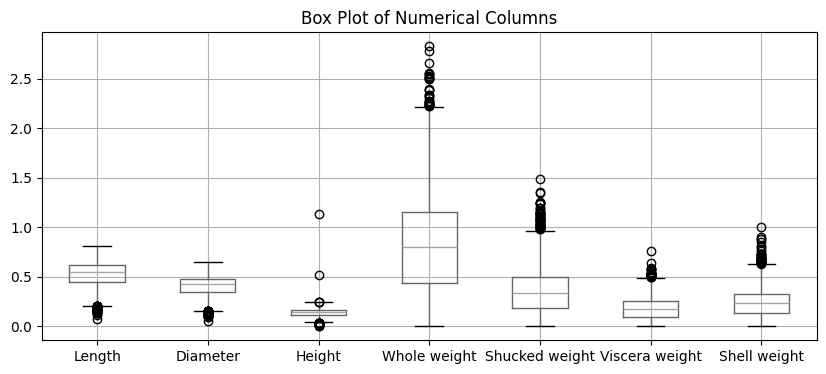

In [127]:
fig, ax = plt.subplots(figsize=(10, 4))
df[numerical_cols].boxplot(ax=ax)

ax.set_title("Box Plot of Numerical Columns")
plt.show()

### Pearson correlation

<Axes: >

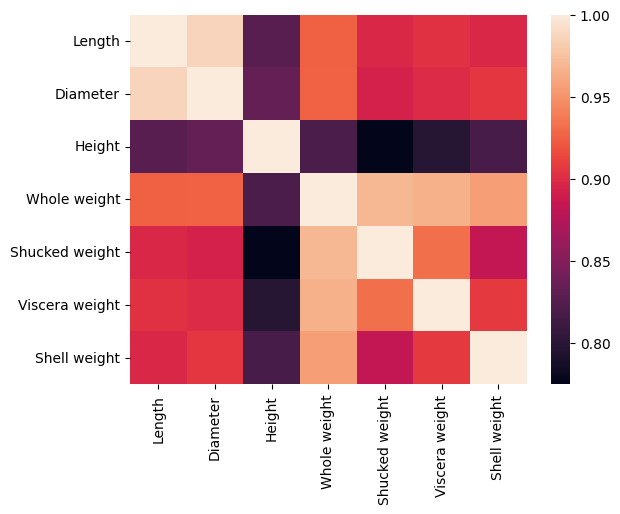

In [ ]:
df_num = df[numerical_cols]
corr = df_num.corr()

sns.heatmap(corr)

### Target Value Analysis

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

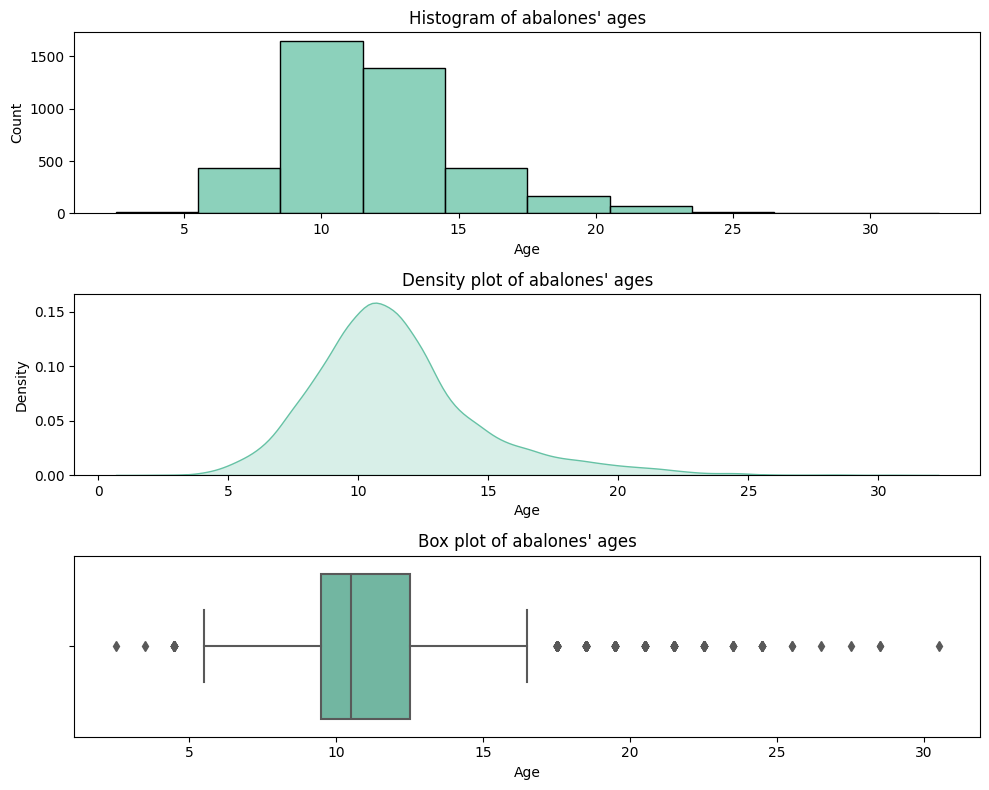

In [125]:

fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Histogram
sns.histplot(data=df, x="Age", binwidth=round(len(df["Age"].unique())**(1/3)), ax=axes[0])
axes[0].set_title("Histogram of abalones' ages")

# Density Plot
sns.kdeplot(data=df, x="Age", fill=True, ax=axes[1])
axes[1].set_title("Density plot of abalones' ages")

# Box Plot
sns.boxplot(data=df, x="Age", ax=axes[2])
axes[2].set_title("Box plot of abalones' ages")

plt.tight_layout()
plt.show()
